https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-kv2001

Problem Statement: McCurr Consultancy – Attrition Analysis

1. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

In [1]:
import pandas as pd  # data processing
import numpy as np   # linear algebra
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_excel('HR_Employee_Attrition Dataset.xlsx')  #import Excel data
data1.dtypes

EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [3]:
data1.shape

(2940, 34)

In [4]:
data1.describe()   #central values (mean and median), standard deviation and quartiles, etc

EmployeeNumber          Age    DailyRate  DistanceFromHome  \
count     2940.000000  2940.000000  2940.000000       2940.000000   
mean      1470.500000    36.923810   802.485714          9.192517   
std        848.849221     9.133819   403.440447          8.105485   
min          1.000000    18.000000   102.000000          1.000000   
25%        735.750000    30.000000   465.000000          2.000000   
50%       1470.500000    36.000000   802.000000          7.000000   
75%       2205.250000    43.000000  1157.000000         14.000000   
max       2940.000000    60.000000  1499.000000         29.000000   

         Education  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count  2940.000000              2940.000000  2940.000000     2940.000000   
mean      2.912925                 2.721769    65.891156        2.729932   
std       1.023991                 1.092896    20.325969        0.711440   
min       1.000000                 1.000000    30.000000        1.000000   
25%       2.000000                 2.000000    48.000000        2.000000   
50%       3.000000                 3.000000    66.000000        3.000000   
75%       4.000000                 4.000000    84.000000        3.000000   
max       5.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  ...  RelationshipSatisfaction  \
count  2940.000000      2940.000000  ...               2940.000000   
mean      2.063946         2.728571  ...                  2.712245   
std       1.106752         1.102658  ...                  1.081025   
min       1.000000         1.000000  ...                  1.000000   
25%       1.000000         2.000000  ...                  2.000000   
50%       2.000000         3.000000  ...                  3.000000   
75%       3.000000         4.000000  ...                  4.000000   
max       5.000000         4.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         2940.0       2940.000000        2940.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.851932           7.779458   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000           2940.000000  
mean             4.229252                 2.187755              4.123129  
std              3.622521                 3.221882              3.567529  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 25 columns]

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

In [6]:
data1.tail()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
2935            2936        No   36  Travel_Frequently        884   
2936            2937        No   39      Travel_Rarely        613   
2937            2938        No   27      Travel_Rarely        155   
2938            2939        No   49  Travel_Frequently       1023   
2939            2940        No   34      Travel_Rarely        628   

                  Department  DistanceFromHome  Education EducationField  \
2935  Research & Development                23          2        Medical   
2936  Research & Development                 6          1        Medical   
2937  Research & Development                 4          3  Life Sciences   
2938                   Sales                 2          3        Medical   
2939  Research & Development                 8          3        Medical   

      EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
2935                        3  ...                        3             80   
2936                        4  ...                        1             80   
2937                        2  ...                        2             80   
2938                        4  ...                        4             80   
2939                        2  ...                        1             80   

      StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
2935                 1                 17                     3   
2936                 1                  9                     5   
2937                 1                  6                     0   
2938                 0                 17                     3   
2939                 0                  6                     3   

      WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
2935                3              5                   2   
2936                3              7                   7   
2937                3              6                   2   
2938                2              9                   6   
2939                4              4                   3   

      YearsSinceLastPromotion  YearsWithCurrManager  
2935                        0                     3  
2936                        1                     7  
2937                        0                     3  
2938                        0                     8  
2939                        1                     2  

[5 rows x 34 columns]

In [7]:
data1.isnull().any() # to identify any null values


EmployeeNumber              False
Attrition                   False
Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalanc

In [8]:
for col in data1.columns:
    print (col, len(data1[col].unique()))   # number of unique in each column

EmployeeNumber 2940
Attrition 2
Age 43
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


CHECK FOR MISSING VALUES

In [9]:
data1.isna().sum()/(len(data1))*100

EmployeeNumber              0.0
Attrition                   0.0
Age                         0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInC

In [10]:
data1.loc[:, data1.isnull().any()].columns

Index([], dtype='object')

In [11]:
data1.skew()

EmployeeNumber              0.000000
Age                         0.413075
DailyRate                  -0.003517
DistanceFromHome            0.957629
Education                  -0.289533
EnvironmentSatisfaction    -0.321490
HourlyRate                 -0.032294
JobInvolvement             -0.498165
JobLevel                    1.024878
JobSatisfaction            -0.329504
MonthlyIncome               1.369117
MonthlyRate                 0.018568
NumCompaniesWorked          1.025947
PercentSalaryHike           0.820709
PerformanceRating           1.920901
RelationshipSatisfaction   -0.302673
StandardHours               0.000000
StockOptionLevel            0.968485
TotalWorkingYears           1.116601
TrainingTimesLastYear       0.552842
WorkLifeBalance            -0.552198
YearsAtCompany              1.763628
YearsInCurrentRole          0.916895
YearsSinceLastPromotion     1.983277
YearsWithCurrManager        0.833025
dtype: float64

Univarite Plots:

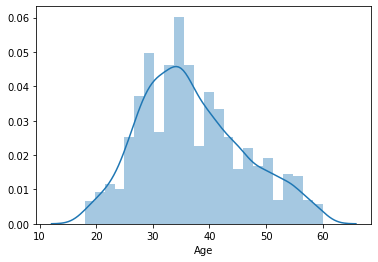

In [12]:
sns.distplot(data1['Age']);

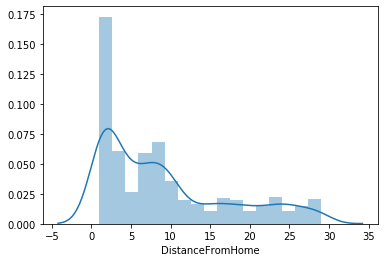

In [13]:
sns.distplot(data1['DistanceFromHome']);

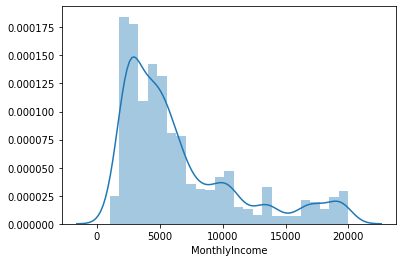

In [14]:
sns.distplot(data1['MonthlyIncome']);

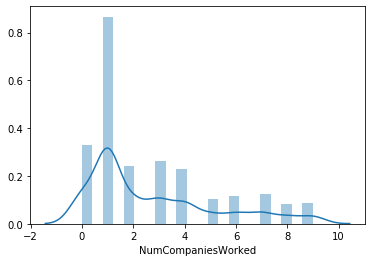

In [15]:
sns.distplot(data1['NumCompaniesWorked']);

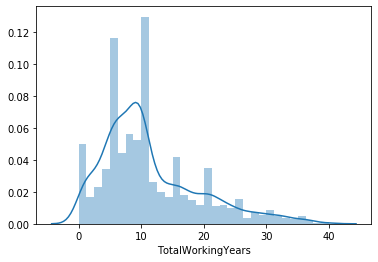

In [16]:
sns.distplot(data1['TotalWorkingYears']);

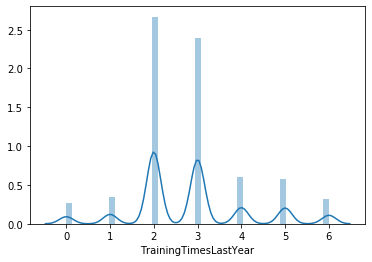

In [17]:
sns.distplot(data1['TrainingTimesLastYear']);

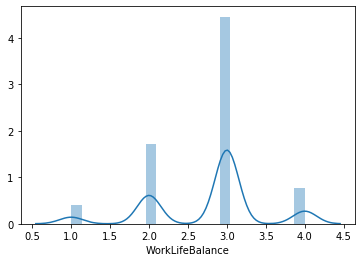

In [18]:
sns.distplot(data1['WorkLifeBalance']);

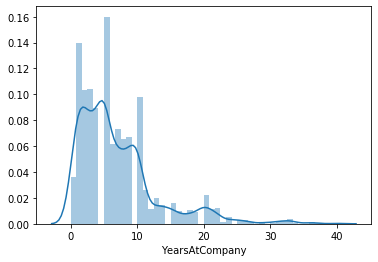

In [19]:
sns.distplot(data1['YearsAtCompany']);

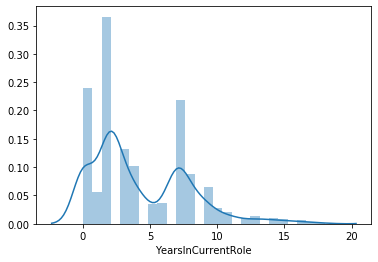

In [20]:
sns.distplot(data1['YearsInCurrentRole']);

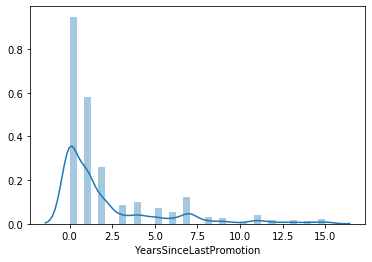

In [21]:
sns.distplot(data1['YearsSinceLastPromotion']);

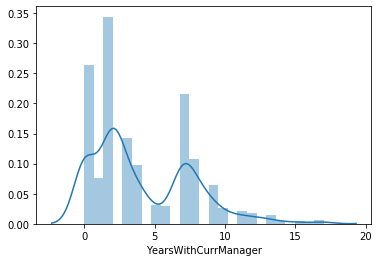

In [22]:
sns.distplot(data1['YearsWithCurrManager']);

2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves.

In [23]:
# Reassign target
data1.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

Count of Attrition

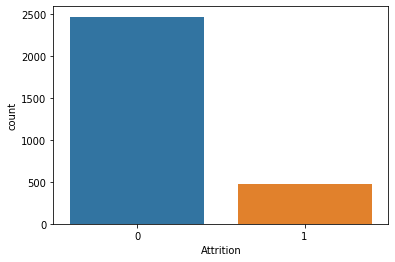

In [24]:
sns.countplot(data1['Attrition']);

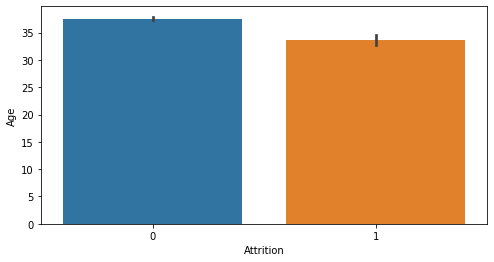

In [25]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="Age", x="Attrition", data=data1)

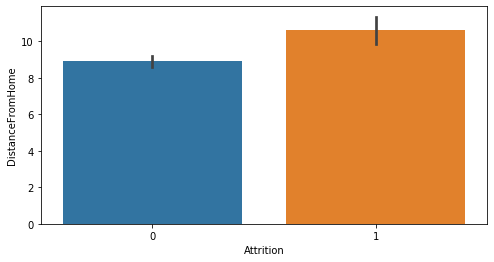

In [26]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="DistanceFromHome", x="Attrition", data=data1)

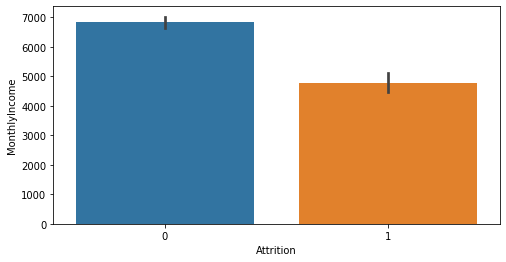

In [27]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="MonthlyIncome", x="Attrition", data=data1)

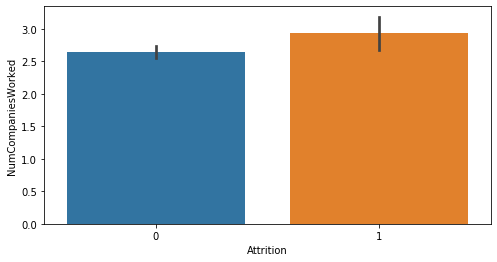

In [28]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="NumCompaniesWorked", x="Attrition", data=data1)

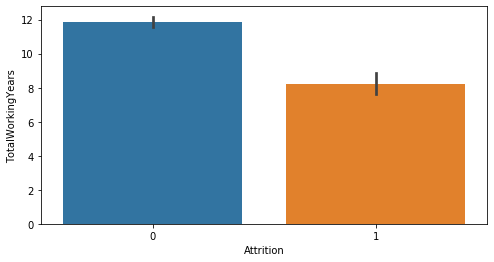

In [29]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="TotalWorkingYears", x="Attrition", data=data1)

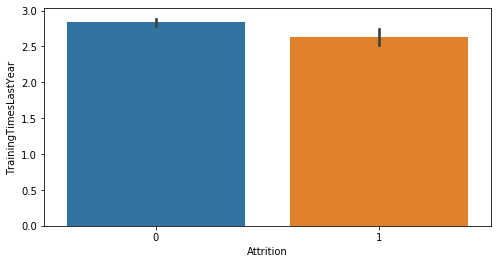

In [30]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="TrainingTimesLastYear", x="Attrition", data=data1)

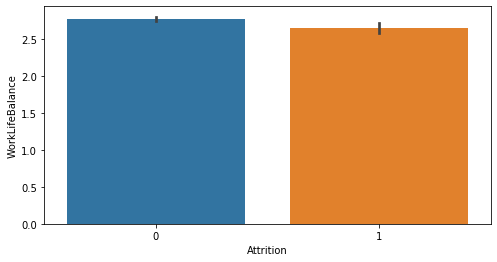

In [31]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="WorkLifeBalance", x="Attrition", data=data1)

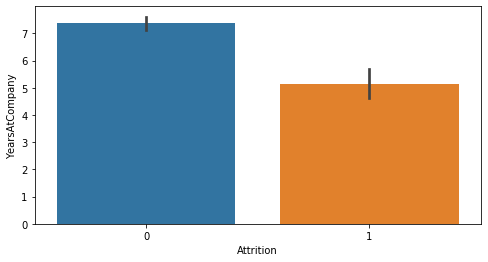

In [32]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="YearsAtCompany", x="Attrition", data=data1)

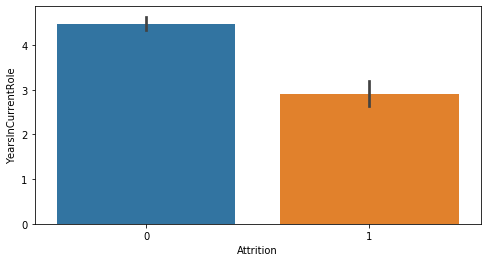

In [33]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="YearsInCurrentRole", x="Attrition", data=data1)

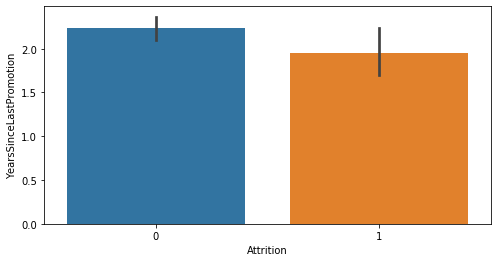

In [34]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="YearsSinceLastPromotion", x="Attrition", data=data1)

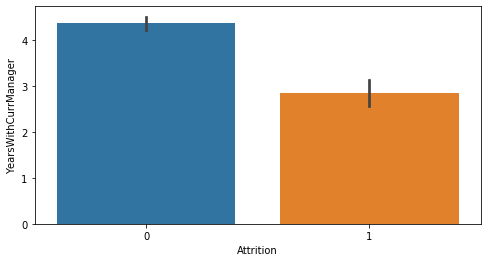

In [35]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y="YearsWithCurrManager", x="Attrition", data=data1)

Degree of Relationship between target variable and feature:  Attrition rate is high when the YearsWithCurrManager is lower(newer). Attrition rate is high when the YearsInCurrentRole is lower(newer).   Attrition rate is high when the YearsAtCompany is lower(newer).Attrition rate is high when the TotalWorkingYears is lower(newer). Attrition rate is high when the NumCompaniesWorked is more.  Attrition rate is high when the DistanceFromHome is higher. 

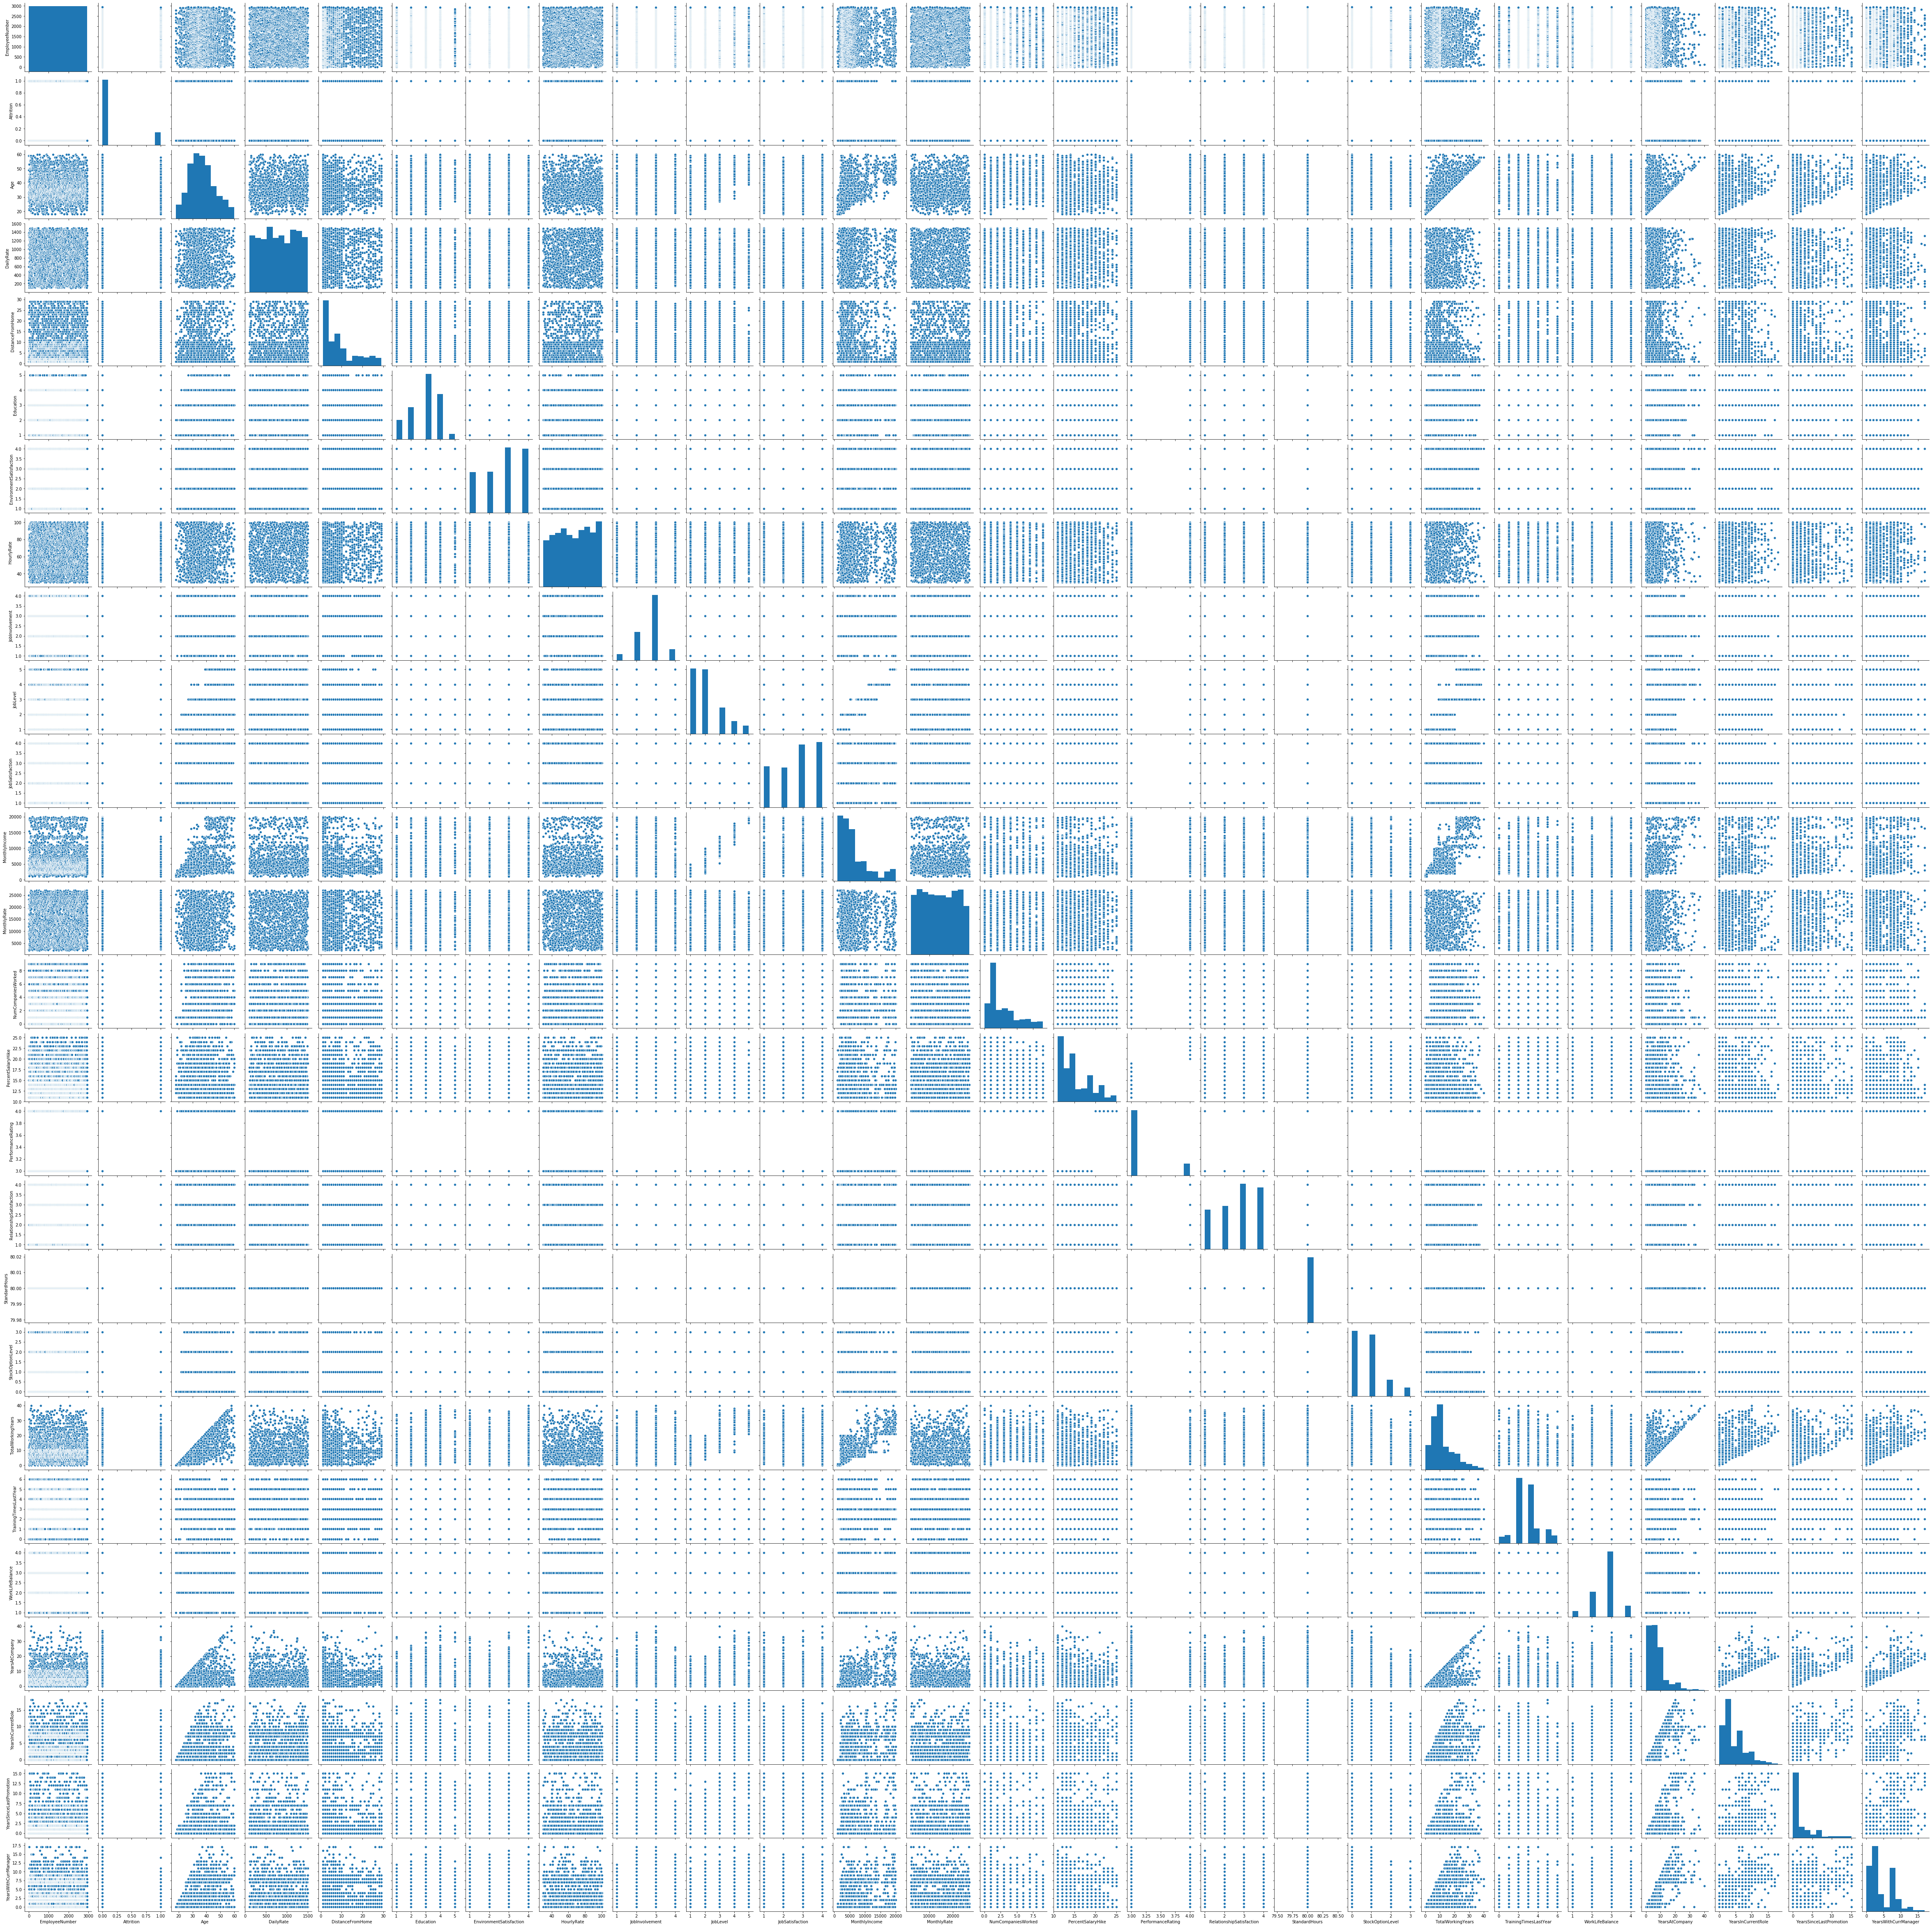

In [36]:
sns.pairplot(data1)

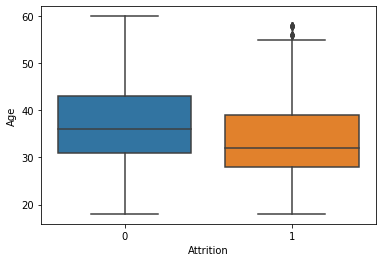

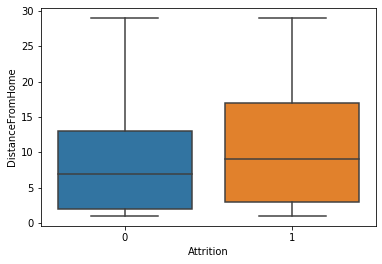

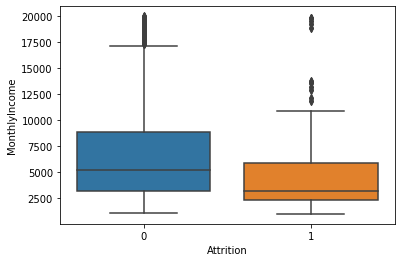

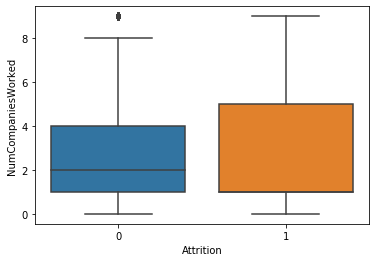

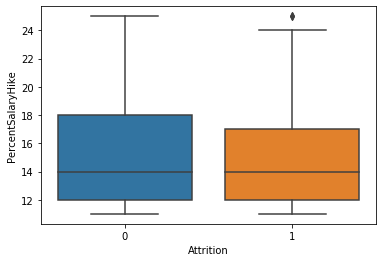

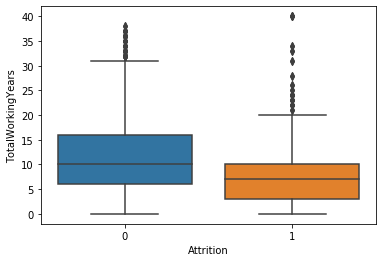

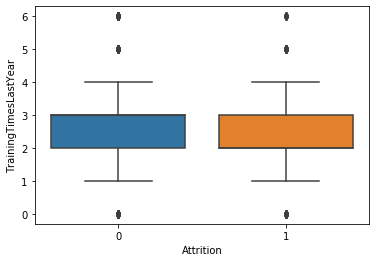

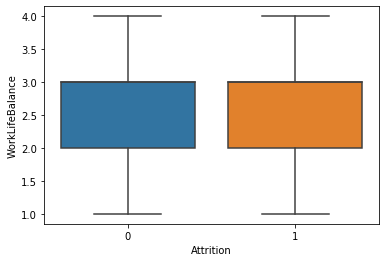

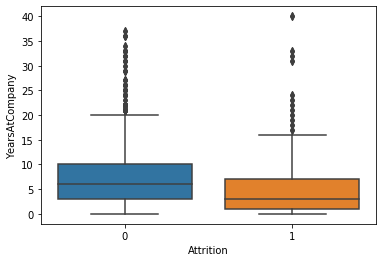

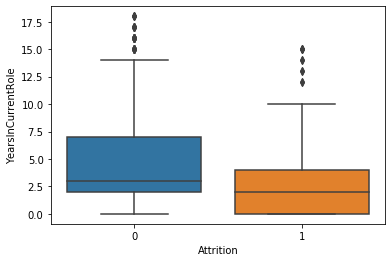

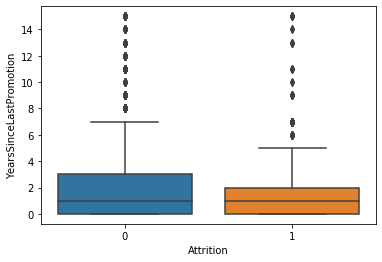

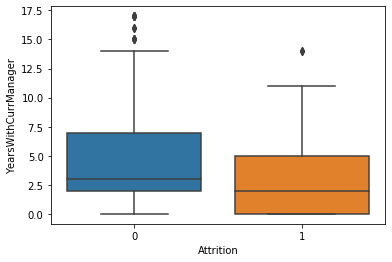

In [37]:
for i in ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']:
    sns.boxplot(x='Attrition',y=i,data=data1)
    plt.show()

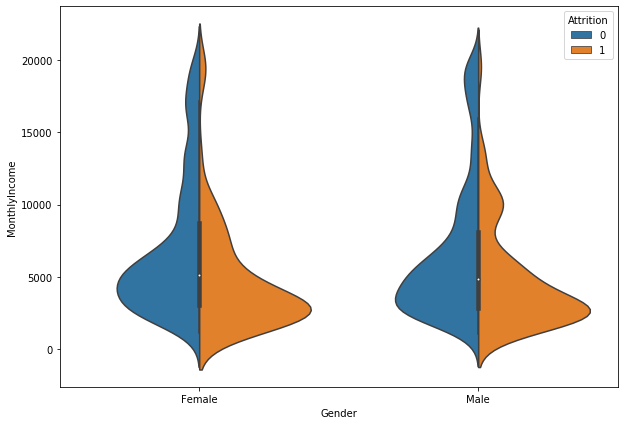

In [38]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=data1)

Gender ditribution does not seems to make much difference to attrition.

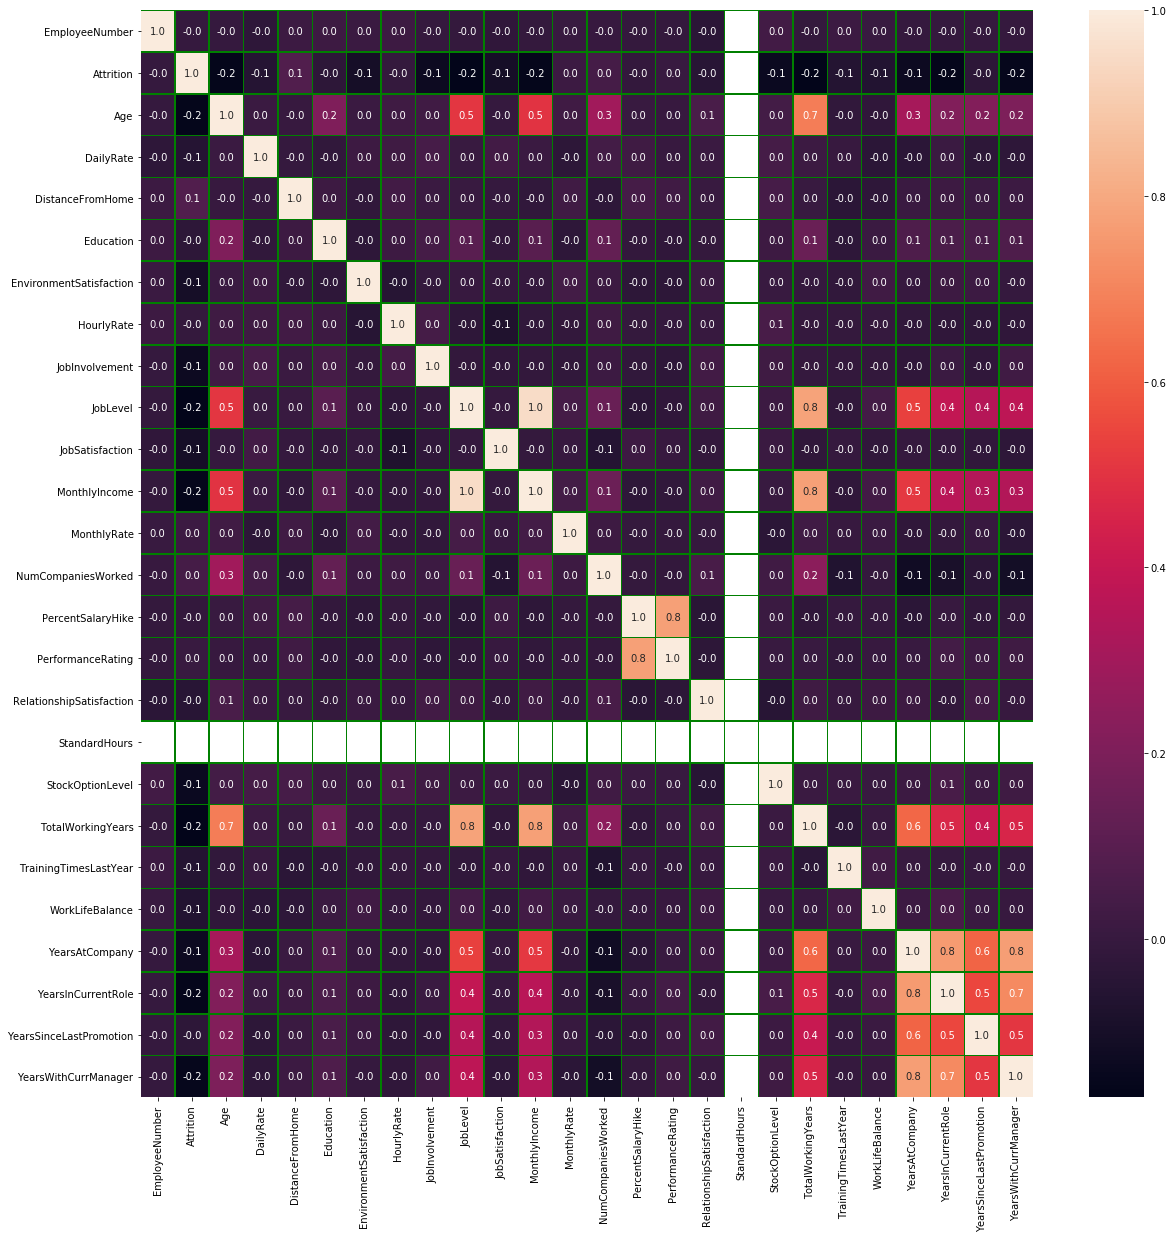

In [39]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

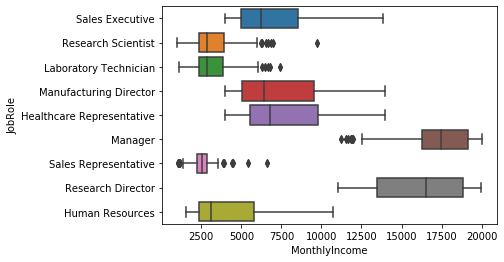

In [40]:
sns.boxplot(x='MonthlyIncome',y='JobRole',data=data1)

3. Feature Engineering techniques
a) Identify opportunities (if any) to create a composite feature, drop a feature (if required)
b) Get data model ready and do a train test split.
c) Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

In [41]:
data1.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [42]:
data1.drop(['EmployeeNumber', 'Over18', 'StandardHours'],axis="columns", inplace=True)

In [43]:
data1.shape

(2940, 31)

In [44]:
df_left = data1[data1['Attrition'] == 1]
df_stay = data1[data1['Attrition'] == 0]

In [45]:
print(f'Percentage of employees left the Company : {(len(df_left) / len(data1))*100} %')
print(f'Percentage of employees Stayed the Company : {(len(df_stay) / len(data1))*100} %')


Percentage of employees left the Company : 16.122448979591837 %
Percentage of employees Stayed the Company : 83.87755102040816 %


In [46]:
x_cat = data1.select_dtypes(include='object')
x_cat

BusinessTravel              Department EducationField  Gender  \
0         Travel_Rarely                   Sales  Life Sciences  Female   
1     Travel_Frequently  Research & Development  Life Sciences    Male   
2         Travel_Rarely  Research & Development          Other    Male   
3     Travel_Frequently  Research & Development  Life Sciences  Female   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
2935  Travel_Frequently  Research & Development        Medical    Male   
2936      Travel_Rarely  Research & Development        Medical    Male   
2937      Travel_Rarely  Research & Development  Life Sciences    Male   
2938  Travel_Frequently                   Sales        Medical    Male   
2939      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus OverTime  
0               Sales Executive        Single      Yes  
1            Research Scientist       Married       No  
2         Laboratory Technician        Single      Yes  
3            Research Scientist       Married      Yes  
4         Laboratory Technician       Married       No  
...                         ...           ...      ...  
2935      Laboratory Technician       Married       No  
2936  Healthcare Representative       Married       No  
2937     Manufacturing Director       Married      Yes  
2938            Sales Executive       Married       No  
2939      Laboratory Technician       Married       No  

[2940 rows x 7 columns]

In [47]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [48]:
x_cat = pd.DataFrame(x_cat)
x_cat

0    1    2    3    4    5    6    7    8    9   ...   18   19   20  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2935  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
2936  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
2937  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  0.0   
2938  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
2939  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   

       21   22   23   24   25   26   27  
0     1.0  0.0  0.0  0.0  1.0  0.0  1.0  
1     0.0  0.0  0.0  1.0  0.0  1.0  0.0  
2     0.0  0.0  0.0  0.0  1.0  0.0  1.0  
3     0.0  0.0  0.0  1.0  0.0  0.0  1.0  
4     0.0  0.0  0.0  1.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
2935  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
2936  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
2937  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
2938  1.0  0.0  0.0  1.0  0.0  1.0  0.0  
2939  0.0  0.0  0.0  1.0  0.0  1.0  0.0  

[2940 rows x 28 columns]

In [49]:
x_numerical = data1.select_dtypes(exclude='object')
x_numerical.drop('Attrition',axis=1,inplace=True)
x_numerical

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
2935   36        884                23          2                        3   
2936   39        613                 6          1                        4   
2937   27        155                 4          3                        2   
2938   49       1023                 2          3                        4   
2939   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
2935          41               4         2                4           2571   
2936          42               2         3                1           9991   
2937          87               4         2                2           6142   
2938          63               2         2                2           5390   
2939          82               4         2                3           4404   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                  3                         1                 0   
1     ...                  4                         4                 1   
2     ...                  3                         2                 0   
3     ...                  3                         3                 0   
4     ...                  3                         4                 1   
...   ...                ...                       ...               ...   
2935  ...                  3                         3                 1   
2936  ...                  3                         1                 1   
2937  ...                  4                         2                 1   
2938  ...                  3                         4                 0   
2939  ...                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
2935                 17                      3                3   
2936                  9                      5                3   
2937                  6                      0                3   
2938                 17                      3                2   
2939                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   


In [50]:
x_data = pd.concat([x_cat,x_numerical],axis=1)
x_data

0    1    2    3    4    5    6    7    8    9  ...  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2935  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
2936  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
2937  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
2938  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...   
2939  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
2935                  3                         3                 1   
2936                  3                         1                 1   
2937                  4                         2                 1   
2938                  3                         4                 0   
2939                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
2935                 17                      3                3   
2936                  9                      5                3   
2937                  6                      0                3   
2938                 17                      3                2   
2939                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
2935               5                   2                        0   
2936               7                   7                        1   
2937               6                   2                        0   
2938               9                   6                        0   
2939               4                   3                        1   

      YearsWithCurrManager  
0                        5  
1                        7  
2                        0  
3                        0  
4                        2  
...                    ...  
2935                     3  
2936                     7  
2937                     3  
2938                     8  
2939                     2  

[2940 rows x 51 columns]

In [51]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x = scalar.fit_transform(x_data)

In [52]:
x

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [53]:
y = data1['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
2935    0
2936    0
2937    0
2938    0
2939    0
Name: Attrition, Length: 2940, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [55]:
print(f'Shape of X train :{X_train.shape}')
print(f'Shape of X test :{X_test.shape}')
print(f'Shape of y train :{y_train.shape}')
print(f'Shape of y test :{y_test.shape}')

Shape of X train :(2205, 51)
Shape of X test :(735, 51)
Shape of y train :(2205,)
Shape of y test :(735,)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix,classification_report
print(f'Accuracy : {100 * accuracy_score(y_pred,y_test)}')

Accuracy : 87.07482993197279


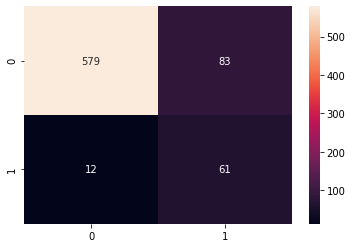

In [60]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [61]:
print('Classification report')
print('======='*10)
print(classification_report(y_pred,y_test))
print('======='*10)

Classification report
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       662
           1       0.42      0.84      0.56        73

    accuracy                           0.87       735
   macro avg       0.70      0.86      0.74       735
weighted avg       0.92      0.87      0.89       735



In [62]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
y_pred = randomforest.predict(X_test)

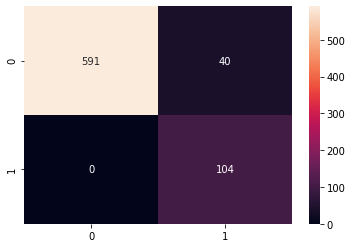

In [64]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [65]:
print('Classification report')
print('======='*10)
print(classification_report(y_pred,y_test))
print('======='*10)

Classification report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       631
           1       0.72      1.00      0.84       104

    accuracy                           0.95       735
   macro avg       0.86      0.97      0.90       735
weighted avg       0.96      0.95      0.95       735



In [66]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
y_pred = xgb.predict(X_test)


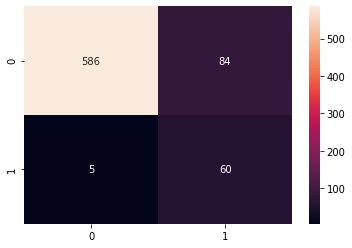

In [68]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [69]:
print('Classification report')
print('======='*10)
print(classification_report(y_pred,y_test))
print('======='*10)

Classification report
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       670
           1       0.42      0.92      0.57        65

    accuracy                           0.88       735
   macro avg       0.70      0.90      0.75       735
weighted avg       0.94      0.88      0.90       735



In [72]:
 !pip3 install -U imbalanced-learn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: imbalanced-learn in /Users/kirivara/Library/Python/3.7/lib/python/site-packages (0.7.0)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [73]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27,sampling_strategy=1.0)
X_train,y_train = sm.fit_sample(X_train,y_train)

ModuleNotFoundError: No module named 'imblearn'

In [74]:
smote_logistic = LogisticRegression()
smote_logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
smote_pred = smote_logistic.predict(X_test)

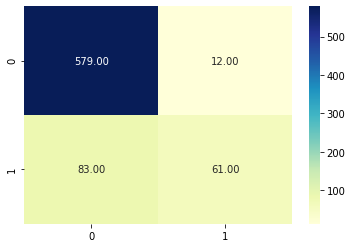

In [76]:
sns.heatmap(confusion_matrix(y_test,smote_pred),annot=True,fmt='.2f',cmap='YlGnBu')
plt.show()

In [77]:
print('Classification report')
print('======='*10)
print(classification_report(smote_pred,y_test))
print('======='*10)

Classification report
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       662
           1       0.42      0.84      0.56        73

    accuracy                           0.87       735
   macro avg       0.70      0.86      0.74       735
weighted avg       0.92      0.87      0.89       735



In [78]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
y_pred_smote = randomforest.predict(X_test)

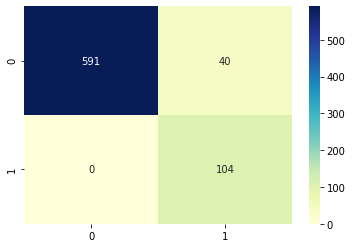

In [80]:
sns.heatmap(confusion_matrix(y_pred_smote,y_test),annot=True,fmt='d',cmap='YlGnBu')
plt.show()

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[0.95488722 0.8034188  0.86486486 0.95726496 0.935      0.84649123
 0.92013889 0.79487179 0.87352941 0.16666667 0.67179487 0.63076923
 0.87878788 0.60416667 0.86100386 0.86403509 0.72357724 0.99561404
 0.8125     0.90074442 0.52380952 0.93968254 0.84126984 0.93968254
 0.80902778 0.84615385 0.69111969 0.91746032 0.71491228 0.84375
 0.66666667 0.96525097 0.65972222 0.95       0.85079365 0.88717949
 0.89930556 0.96410256 0.97683398 0.80716253 0.94736842 0.92664093
 0.9        0.8452381  0.84126984 0.85087719 0.85526316 0.79069767
 0.97368421 0.94594595]
Accuracy: 83.262% (14.292%)


Techniques employed to squeeze that extra performance out of the model without making it over fit or under fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above.

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [83]:
# build a classifier
clf = RandomForestClassifier(n_estimators=50)

In [84]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [85]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

In [86]:
randomCV.fit(X_train, y_train)

 
print(randomCV.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 4}
